In [1]:
%matplotlib inline

import random
import math
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Exploring Data

## One Dimension Data

In [2]:
def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]
normal = st.norm.rvs(size=10000)

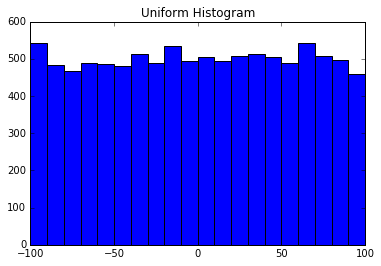

In [3]:
plot_histogram(uniform, 10, "Uniform Histogram")

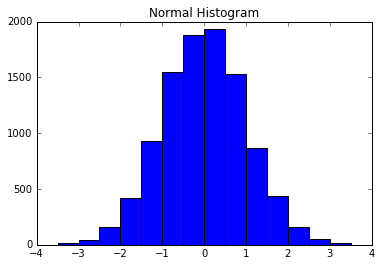

In [4]:
plot_histogram(normal, 0.5, "Normal Histogram")

## Two Dimension Data

In [5]:
import scipy.stats as st

xs = st.norm.rvs(size=1000)
ys1 = [ x + st.norm.rvs() / 2 for x in xs]
ys2 = [-x + st.norm.rvs() / 2 for x in xs]

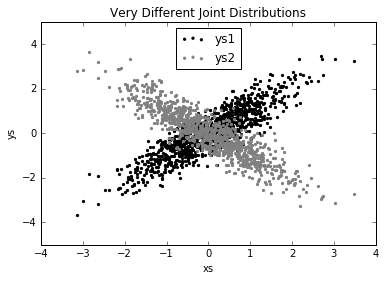

In [6]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

# Many Dimensions

A more visual approach (if you don't have too many dimensions) is to make a scatter-plot matrix showing all pairewise scatterplots

In [11]:
data = [[[1, 2],[3, 4]],
        [[5, 6],[7, 8]]]

In [12]:
_, num_columns = np.array(data).shape
fig, ax = plt.subplots(num_columns, num_columns)

for i in range(num_columns):
    for j in range(num_columns):
        # scatter column_j on the x-axis vs column_i on the y-axis
        if i != j:
            ax[i][j].scatter(np.mat(data)[:, j], np.mat(data)[:, i])
            
        # unless i == j, in which case show the series name
        else:
            ax[i][j].annotate("series " + str(i),
                              (0.5, 0.5),
                              xycoords='axes fraction',
                              ha="center", va="center")
            
        # then hide axis labels except left and bottom charts
        if i < num_columns - 1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0:
            ax[i][j].yaxis.set_visible(False)

# fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()

ValueError: too many values to unpack (expected 2)